In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#only jupiter
from sklearn.ensemble import RandomForestClassifier

In [3]:
df= pd.read_csv("dataset/train.csv").replace("male",0).replace("female",1)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df["Age"].fillna(df.Age.median(), inplace=True)

([array([  80.,   97.,  372.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

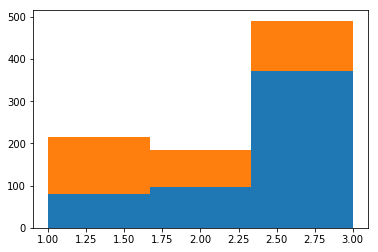

In [6]:
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

([array([  13.,   13.,    8.,   63.,   80.,  191.,   47.,   39.,   30.,
           23.,   14.,   11.,   10.,    3.,    4.,    0.]),
  array([  44.,   20.,   19.,   96.,  122.,  285.,   88.,   67.,   47.,
           39.,   24.,   18.,   14.,    3.,    4.,    1.])],
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 2 Lists of Patches objects>)

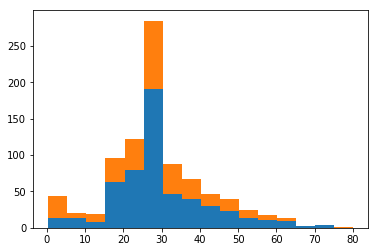

In [7]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

In [8]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [9]:
df2

,PassengerId,Survived,Pclass,Sex,Age,FamilySize
0,1,0,3,0,22.0,2
1,2,1,1,1,38.0,2
2,3,1,3,1,26.0,1
3,4,1,1,1,35.0,2
4,5,0,3,0,35.0,1
5,6,0,3,0,28.0,1
6,7,0,1,0,54.0,1
7,8,0,3,0,2.0,5
8,9,1,3,1,27.0,3
9,10,1,2,1,14.0,2


In [10]:
train_data = df2.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

In [11]:
forest = RandomForestClassifier(n_estimators = 100)

# 学習
forest = forest.fit(xs, y)

test_df= pd.read_csv("dataset/test.csv").replace("male",0).replace("female",1)
# 欠損値の補完
test_df["Age"].fillna(df.Age.median(), inplace=True)
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [12]:
test_data = test_df2.values
xs_test = test_data[:, 1:]
output = forest.predict(xs_test)

print(len(test_data[:,0]), len(output))
zip_data = zip(test_data[:,0].astype(int), output.astype(int))
predict_data = list(zip_data)

418 418


In [13]:
predict_data

[(892, 0),
 (893, 0),
 (894, 1),
 (895, 1),
 (896, 1),
 (897, 0),
 (898, 0),
 (899, 0),
 (900, 0),
 (901, 1),
 (902, 0),
 (903, 0),
 (904, 1),
 (905, 0),
 (906, 1),
 (907, 1),
 (908, 0),
 (909, 0),
 (910, 1),
 (911, 0),
 (912, 0),
 (913, 1),
 (914, 1),
 (915, 0),
 (916, 1),
 (917, 0),
 (918, 1),
 (919, 0),
 (920, 0),
 (921, 1),
 (922, 0),
 (923, 0),
 (924, 1),
 (925, 0),
 (926, 0),
 (927, 0),
 (928, 1),
 (929, 0),
 (930, 0),
 (931, 0),
 (932, 0),
 (933, 0),
 (934, 0),
 (935, 1),
 (936, 1),
 (937, 0),
 (938, 0),
 (939, 0),
 (940, 1),
 (941, 1),
 (942, 0),
 (943, 0),
 (944, 1),
 (945, 1),
 (946, 0),
 (947, 0),
 (948, 0),
 (949, 0),
 (950, 0),
 (951, 1),
 (952, 0),
 (953, 0),
 (954, 0),
 (955, 1),
 (956, 1),
 (957, 1),
 (958, 0),
 (959, 0),
 (960, 0),
 (961, 1),
 (962, 0),
 (963, 0),
 (964, 1),
 (965, 0),
 (966, 1),
 (967, 1),
 (968, 0),
 (969, 1),
 (970, 0),
 (971, 0),
 (972, 1),
 (973, 0),
 (974, 1),
 (975, 0),
 (976, 0),
 (977, 0),
 (978, 1),
 (979, 0),
 (980, 1),
 (981, 1),
 (982, 0),

In [14]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])